<a href="https://colab.research.google.com/github/RoaaM/diamond_price_prediction/blob/main/Copy_of_diamond_price_prediction_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  **Import all basic libraries**


In [ ]:
import numpy as np
from numpy import asarray
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import missingno as msno


from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import TweedieRegressor
from sklearn.linear_model import Lasso
from sklearn.cross_decomposition import PLSRegression
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error

# **Get the data**


In [ ]:
train_df = pd.read_csv("/content/train.csv")
train_df.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [ ]:
test_df = pd.read_csv("/content/test.csv")
test_df.head()

,Id,carat,cut,color,clarity,depth,table,x,y,z
0,1,0.34,Ideal,G,VVS2,61.1,57.0,4.52,4.48,2.75
1,2,0.71,Premium,E,VS2,62.7,58.0,5.74,5.68,3.58
2,3,0.44,Very Good,I,VS1,62.8,56.0,4.83,4.88,3.05
3,4,0.81,Premium,E,SI2,60.1,59.0,6.09,6.03,3.65
4,5,0.40,Ideal,G,VVS1,61.2,56.0,4.74,4.80,2.92


In [ ]:
train_df.shape

(43152, 11)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       43152 non-null  int64  
 1   carat    43152 non-null  float64
 2   cut      43152 non-null  object 
 3   color    43152 non-null  object 
 4   clarity  43152 non-null  object 
 5   depth    43152 non-null  float64
 6   table    43152 non-null  float64
 7   price    43152 non-null  int64  
 8   x        43152 non-null  float64
 9   y        43152 non-null  float64
 10  z        43152 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


notice type price is int

In [ ]:
# train_df['price'] = train_df['price'].astype(float)

Checking the summary statistics.

In [ ]:
train_df.describe()

,Id,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,21576.500000,0.797855,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,12457.053745,0.473594,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,10788.750000,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,21576.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,32364.250000,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,43152.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


we can see the Min. Values of X, Y and Z. It can't be possible..!!

It doesn't make any sense to have either of Length or Width or Height to be zero..

In [ ]:
train_df.nunique()

Id         43152
carat        266
cut            5
color          7
clarity        8
depth        179
table        121
price      10640
x            546
y            543
z            368
dtype: int64

## Features
* **Carat : ** Carat weight of the Diamond.
* **Cut : ** Describe cut quality of the diamond. * Quality in increasing order Fair, Good, Very Good, Premium, Ideal .
* **Color : ** Color of the Diamond. * With D being the best and J the worst.
* **Clarity : ** Diamond Clarity refers to the absence of the Inclusions and Blemishes. * (In order from Best to Worst, FL = flawless, I3= level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3
* **Depth : ** The Height of a Diamond, measured from the Culet to the table, divided by its average Girdle Diameter.
* **Table : ** The Width of the Diamond's Table expressed as a Percentage of its Average Diameter.
* **Price : ** the Price of the Diamond.
* **X : ** Length of the Diamond in mm.
* **Y : ** Width of the Diamond in mm.
* **Z : ** Height of the Diamond in mm.

*Qualitative Features (Categorical) : Cut, Color, Clarity. *

*Quantitative Features (Numerical) : Carat, Depth , Table , Price , X , Y, Z.*


### Price is the Target Variable.

# check if any null values in data and any duplicated data


In [ ]:
train_df.isnull().sum()

Id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

<Axes: >

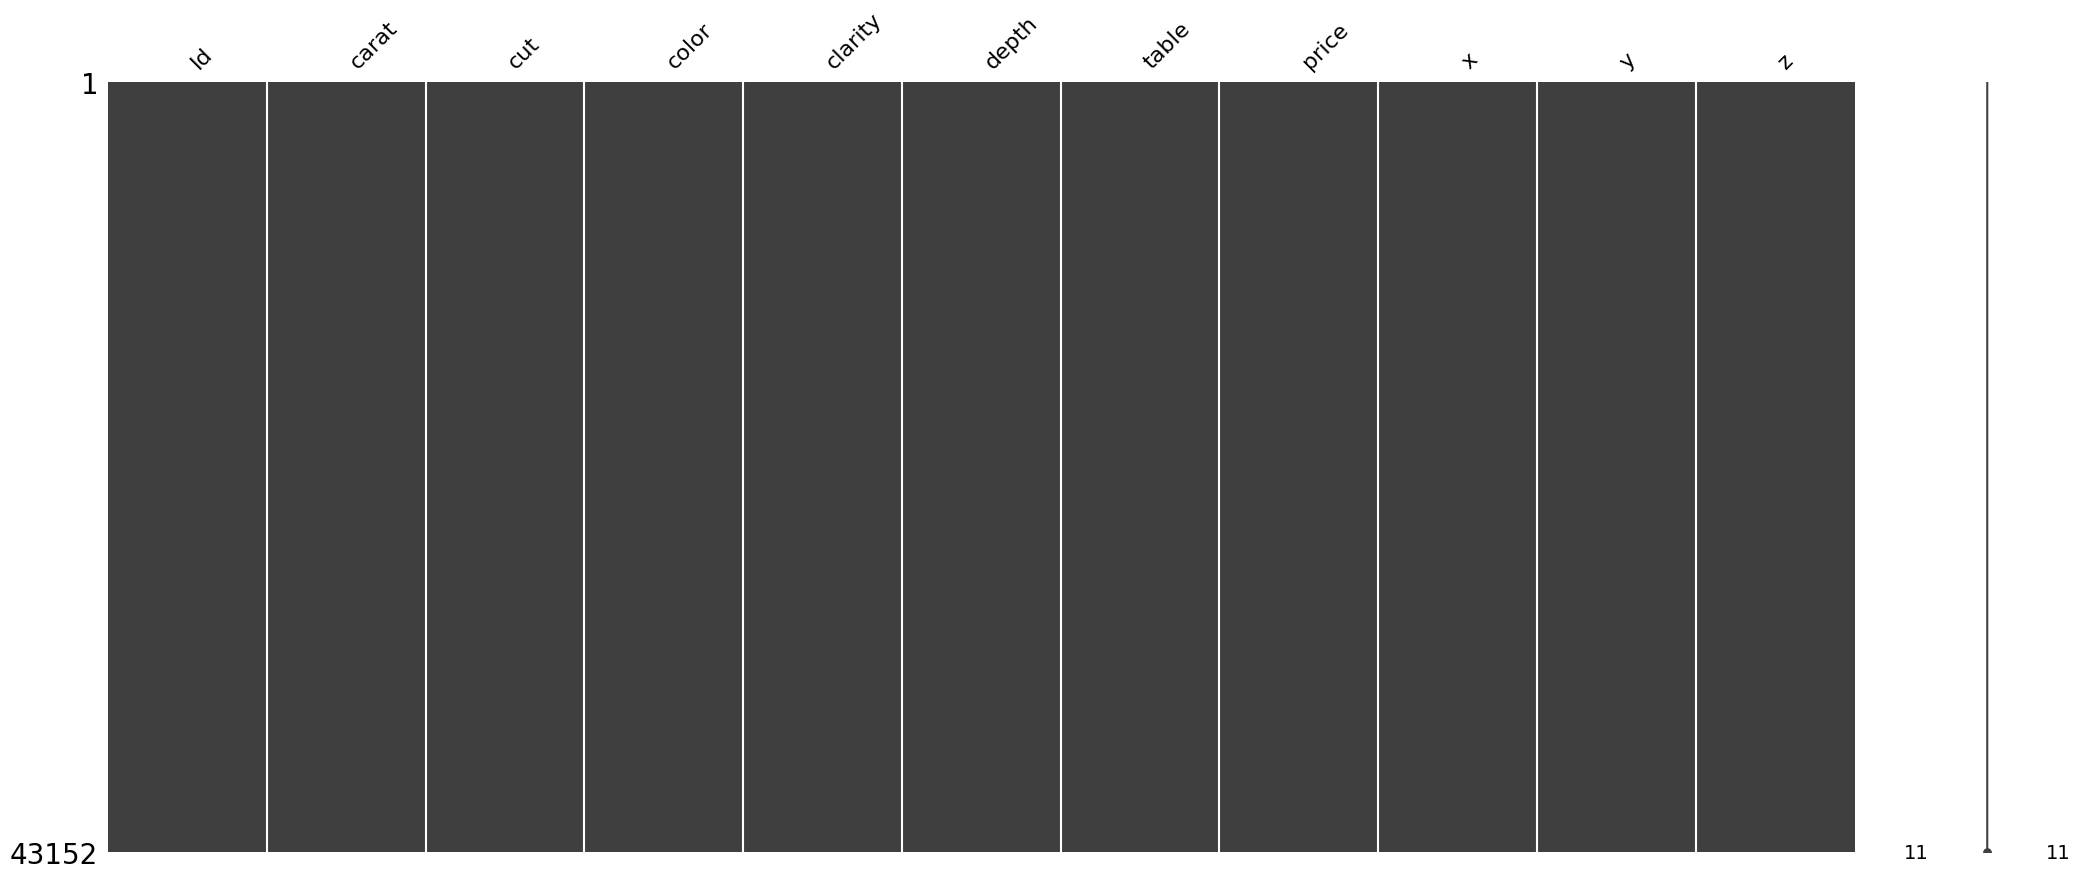

In [ ]:
msno.matrix(train_df)

there are no NaN values.

In [ ]:
train_df.duplicated().sum()

0

In [ ]:
len(train_df[(train_df['x']==0) | (train_df['y']==0) | (train_df['z']==0)])

17

In [ ]:
len(test_df[(test_df['x']==0) | (test_df['y']==0) | (test_df['z']==0)])

3

In [ ]:
train_df.columns

Index(['Id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price',
       'x', 'y', 'z'],
      dtype='object')

In [ ]:
s = (train_df.dtypes !="object")
object_cols = list(s[s].index)
print("Numerical variables:")
print(object_cols)

Numerical variables:
['Id', 'carat', 'depth', 'table', 'price', 'x', 'y', 'z']


In [ ]:
s = (train_df.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['cut', 'color', 'clarity']


In [ ]:
print(f"number of cut we have {train_df.cut.nunique()}")
print(f"unique cut we have \n {train_df.cut.unique()}")

number of cut we have 5
unique cut we have 
 ['Ideal' 'Premium' 'Very Good' 'Fair' 'Good']


In [ ]:
print(f"number of color we have {train_df.color.nunique()}")
print(f"unique color we have \n {train_df.color.unique()}")

number of color we have 7
unique color we have 
 ['I' 'G' 'F' 'H' 'D' 'E' 'J']


In [ ]:
print(f"number of clarity we have {train_df.clarity.nunique()}")
print(f"unique clarity we have \n {train_df.clarity.unique()}")

number of clarity we have 8
unique clarity we have 
 ['SI2' 'VVS2' 'VS2' 'IF' 'VS1' 'SI1' 'VVS1' 'I1']


# Visual Exploratory Data Analysis


array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'depth'}>],
       [<Axes: title={'center': 'table'}>, <Axes: title={'center': 'x'}>,
        <Axes: title={'center': 'y'}>],
       [<Axes: title={'center': 'z'}>, <Axes: >, <Axes: >]], dtype=object)

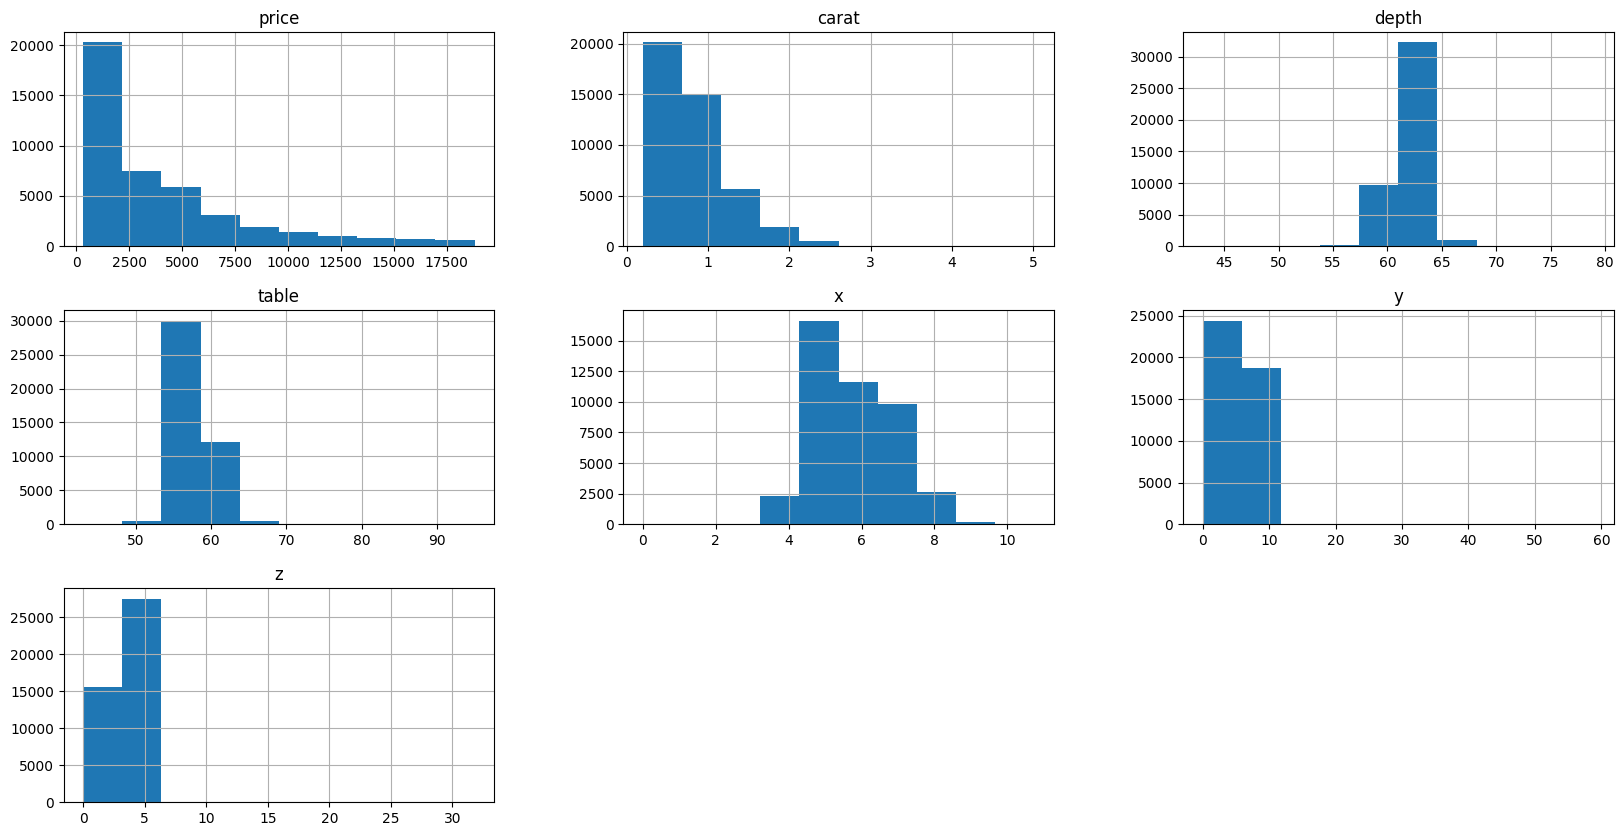

In [ ]:
train_df.hist(['price','carat', 'depth', 'table', 'x','y','z'], figsize=(20,10))

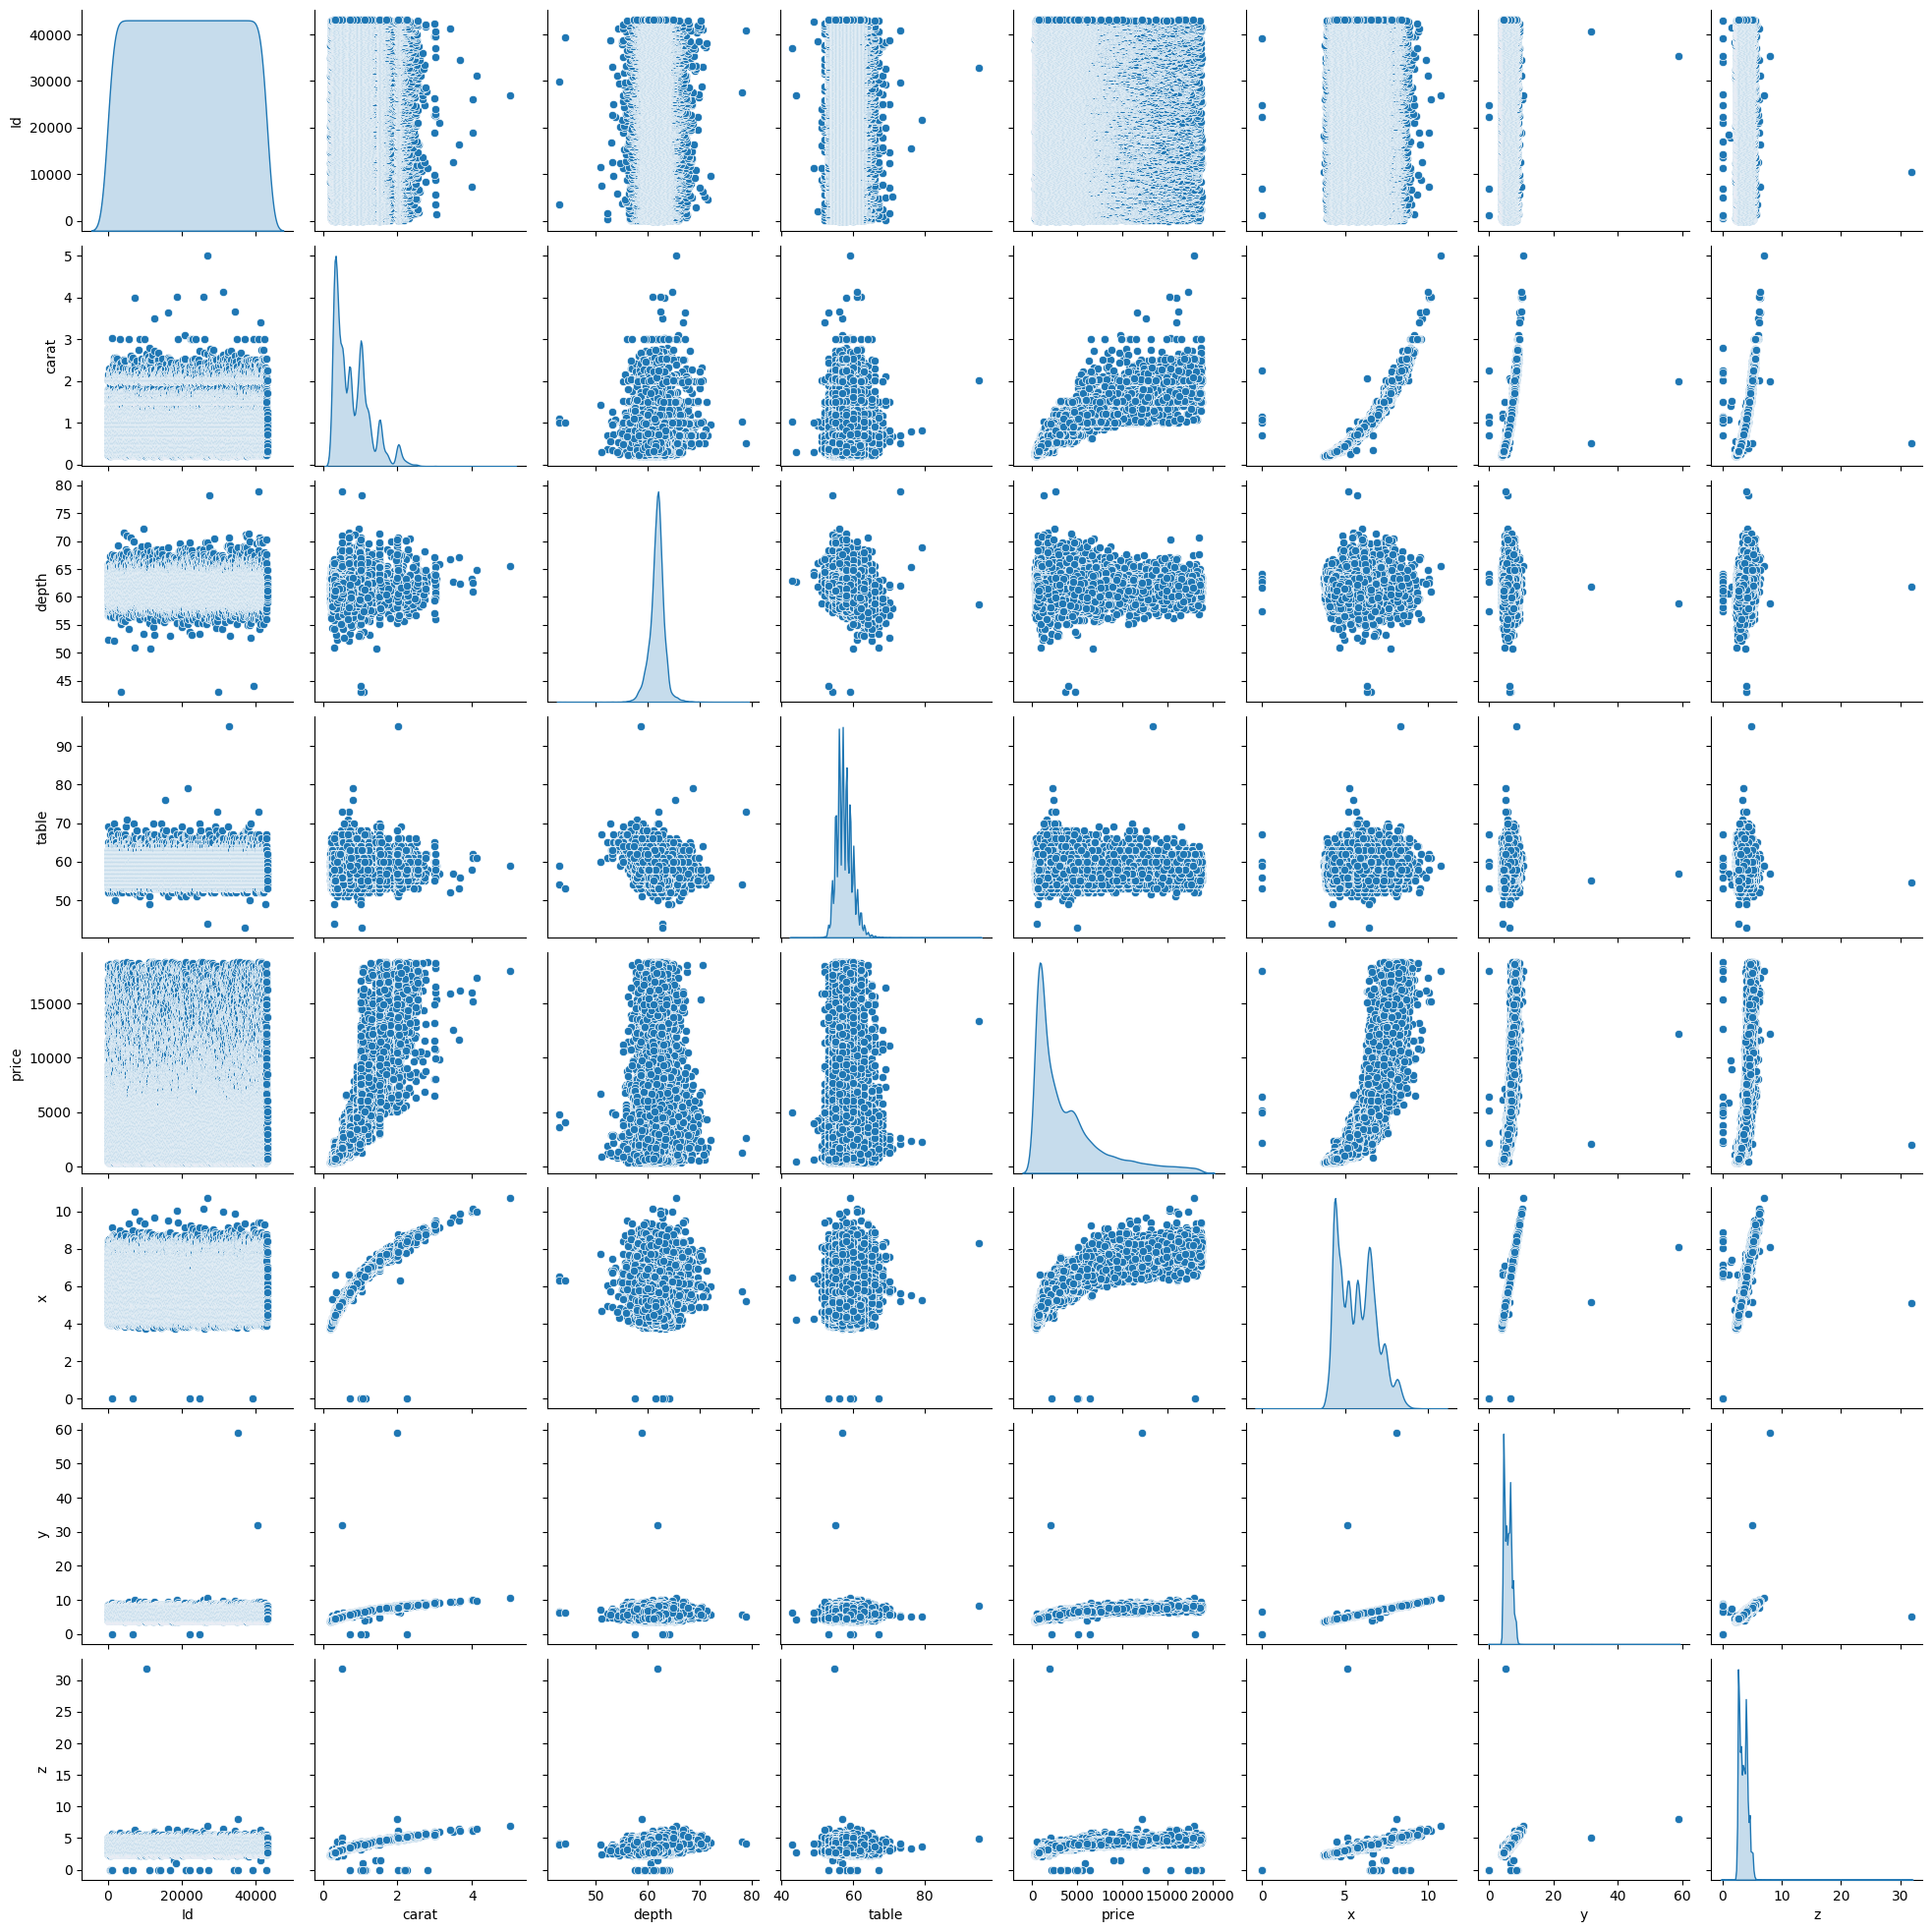

In [ ]:
sns.pairplot(train_df , diag_kind = 'kde');


In [ ]:
sns.factorplot(data=train_df , kind='box' , size=7, aspect=2.5)

AttributeError: ignored

The Values are Distributed over a Small Scale




In [ ]:
num_cols = train_df.keys()
for i in num_cols:
    if train_df[i].dtypes !="object":
      plt.figure(figsize=(7,4))
      sns.boxplot(x=train_df[i],palette="Set2");
      plt.show()

In [ ]:
for c in object_cols:
    plt.figure(figsize=(8,5))

    sns.countplot(x = train_df[c].to_numpy(),palette ="Set3")
    plt.show()
    print(train_df[c] .value_counts())
    print("-"*25)

# Visualization every feature

# carat





In [ ]:
sns.kdeplot(train_df['carat'], shade=True , color='r')

In [ ]:
sns.jointplot(x='carat' , y='price' , data=train_df , size=5)

In [ ]:
sns.factorplot(x='cut', data=train_df , kind='count',aspect=2.5 )

In [ ]:
sns.factorplot(x='cut', y='price', data=train_df, kind='box' ,aspect=2.5 )

we can see ordinal featur cut by price

# color

In [ ]:
sns.factorplot(x='color', data=train_df , kind='count',aspect=2.5 )

In [ ]:
sns.factorplot(x='color', y='price' , data=train_df , kind='violin', aspect=2.5)

# clarity

In [ ]:
labels = train_df.clarity.unique().tolist()
sizes = train_df.clarity.value_counts().tolist()
colors = ['#006400', '#E40E00', '#A00994', '#613205', '#FFED0D', '#16F5A7','#ff9999','#66b3ff']
explode = (0.1, 0.0, 0.1, 0, 0.1, 0, 0.1,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=0)
plt.axis('equal')
plt.title("Percentage of Clarity Categories")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

In [ ]:
sns.boxplot(x='clarity', y='price', data=train_df )

# depth

In [ ]:
plt.hist('depth' , data=train_df , bins=25)

TypeError: ignored

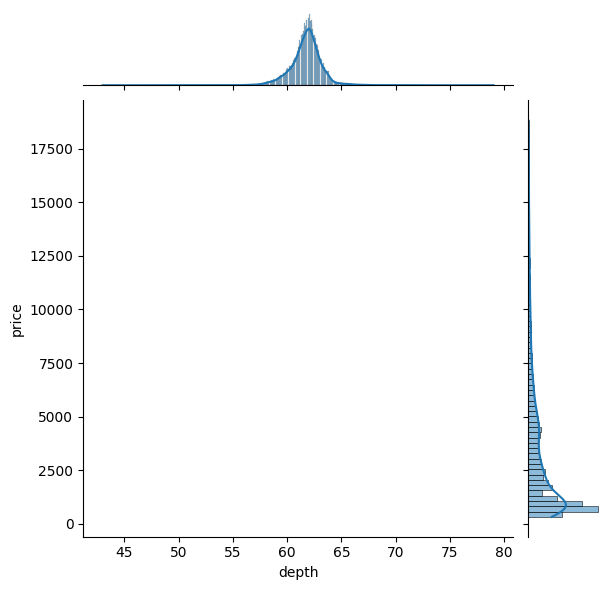

In [ ]:
sns.jointplot(x='depth', y='price' , data=train_df , kind='reg', size=5)

# table

<ipython-input-24-b1e75cf4822e>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_df['table'] ,shade=True , color='orange')


<Axes: xlabel='table', ylabel='Density'>

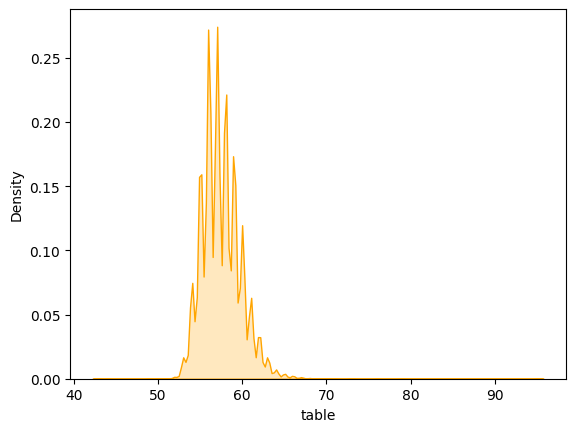

In [ ]:
sns.kdeplot(train_df['table'] ,shade=True , color='orange')

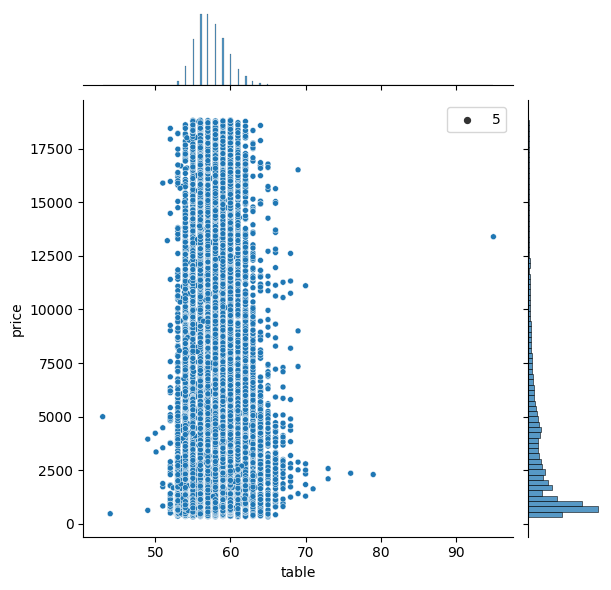

In [ ]:
sns.jointplot(x='table', y='price', data=train_df , size=5)

<ipython-input-26-910cd51a0852>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_df['x'] ,shade=True , color='r' )
<ipython-input-26-910cd51a0852>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_df['y'] , shade=True , color='g' )
<ipython-input-26-910cd51a0852>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_df['z'] , shade= True , color='b')


(2.0, 10.0)

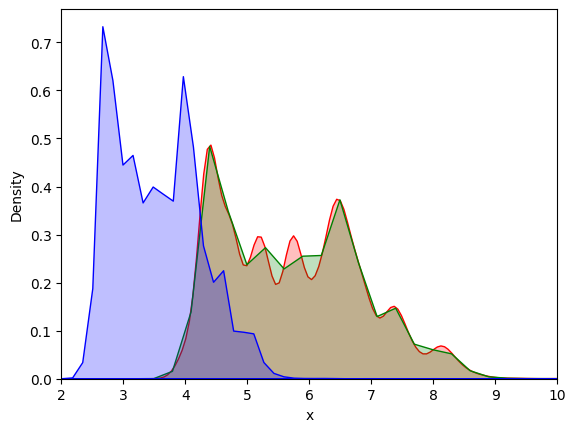

In [ ]:
sns.kdeplot(train_df['x'] ,shade=True , color='r' )
sns.kdeplot(train_df['y'] , shade=True , color='g' )
sns.kdeplot(train_df['z'] , shade= True , color='b')
plt.xlim(2,10)

In [ ]:
train_df['Id'][train_df['table'] > 70].count()

6

In [ ]:
train_df['Id'][train_df['x'] < 3].count()

5

In [ ]:
train_df['Id'][train_df['y'] > 20].count()

2

# Correlation Between Features

In [ ]:
train_df.corr()

<ipython-input-30-a7a80d20a44e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_df.corr()


,Id,carat,depth,table,price,x,y,z
Id,1.000000,0.001141,-0.000776,-0.000739,-0.001111,-0.000519,0.001660,-0.000981
carat,0.001141,1.000000,0.023944,0.182889,0.921911,0.975760,0.947060,0.948923
depth,-0.000776,0.023944,1.000000,-0.302794,-0.013137,-0.029601,-0.033354,0.090834
table,-0.000739,0.182889,-0.302794,1.000000,0.128501,0.197342,0.184310,0.150746
price,-0.001111,0.921911,-0.013137,0.128501,1.000000,0.885181,0.861354,0.857665
x,-0.000519,0.975760,-0.029601,0.197342,0.885181,1.000000,0.968954,0.965677
y,0.001660,0.947060,-0.033354,0.184310,0.861354,0.968954,1.000000,0.942670
z,-0.000981,0.948923,0.090834,0.150746,0.857665,0.965677,0.942670,1.000000


<ipython-input-31-c0c96743af85>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_df.corr(),annot = True , cmap = 'coolwarm' );


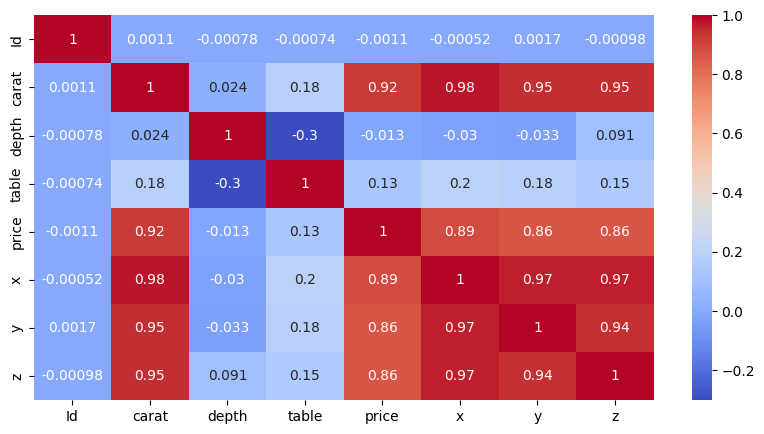

In [ ]:
plt.figure(figsize = (10,5))
sns.heatmap(train_df.corr(),annot = True , cmap = 'coolwarm' );

In [ ]:
corr_matrix = train_df.corr()
corr_matrix["price"].abs().sort_values(ascending=False)

<ipython-input-32-8fe4ab1aefb9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train_df.corr()


price    1.000000
carat    0.921911
x        0.885181
y        0.861354
z        0.857665
table    0.128501
depth    0.013137
Id       0.001111
Name: price, dtype: float64

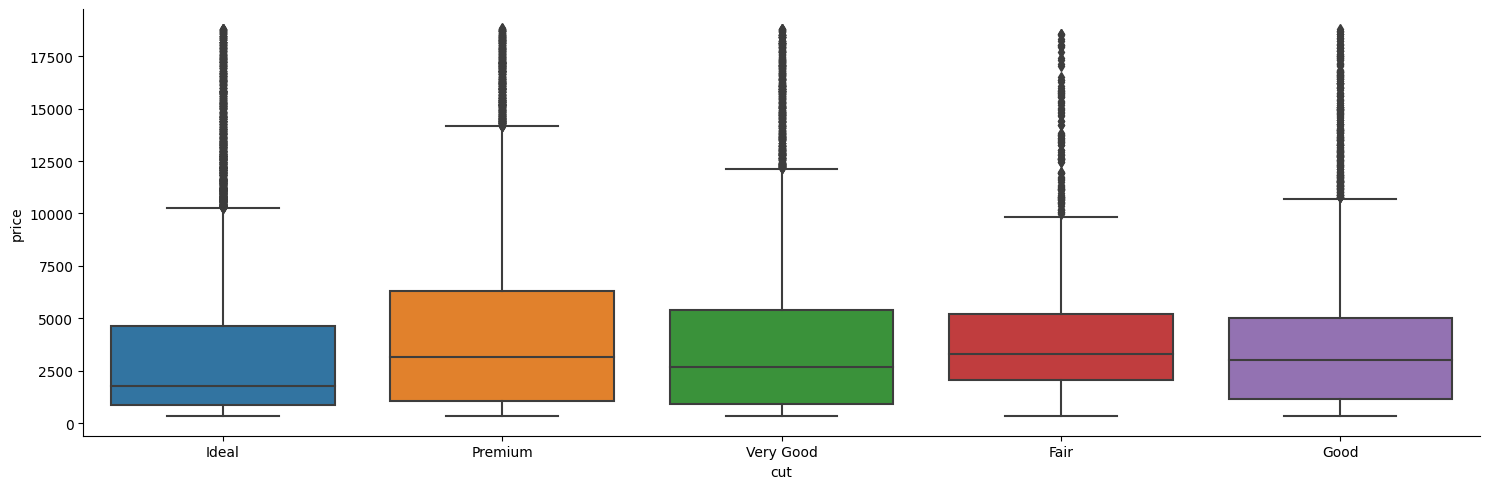

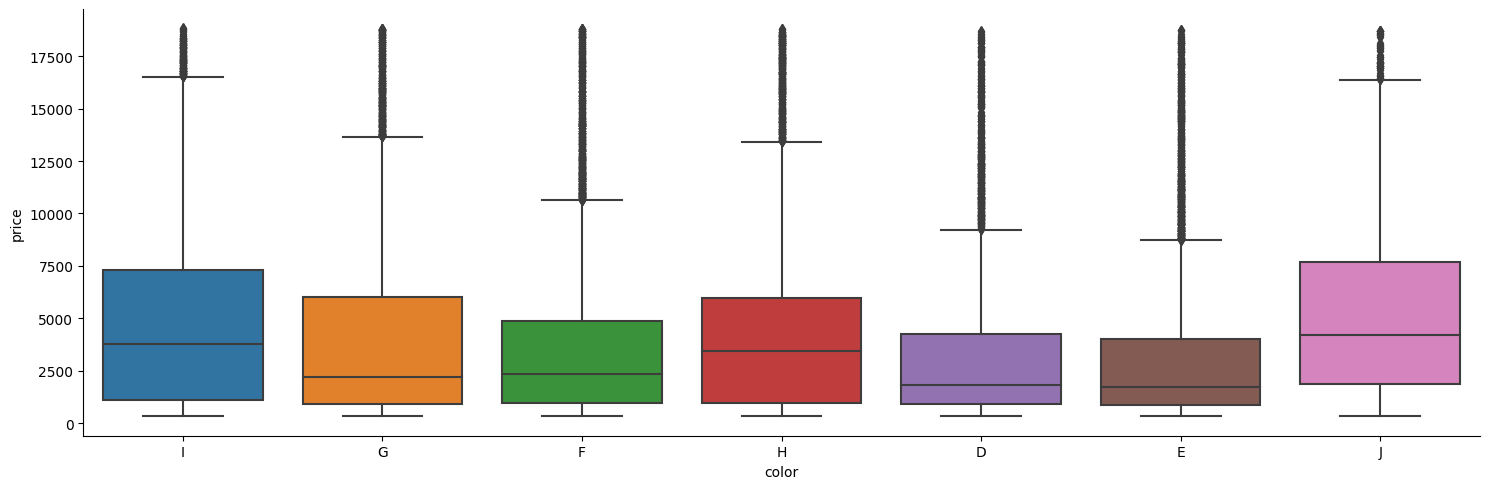

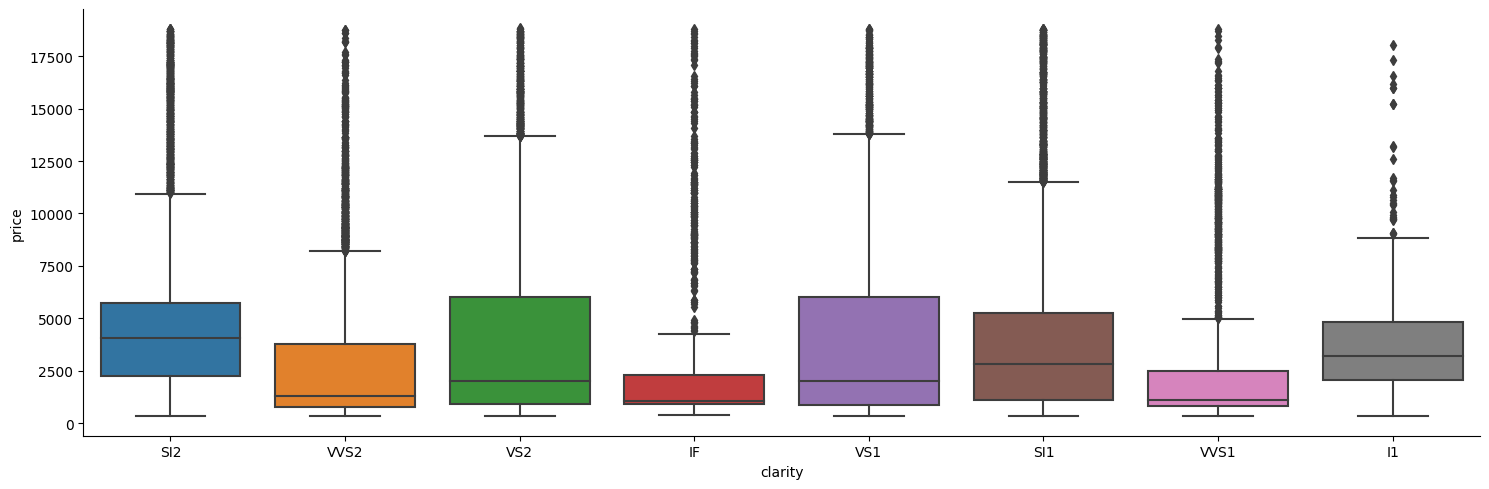

In [ ]:
input_cat_columns = train_df.select_dtypes(include = ['object']).columns.tolist()

for col in input_cat_columns:
    sns.catplot(x=col, y="price",
            kind="box", dodge=False, height = 5, aspect = 3,data=train_df);

In [ ]:
train_df.query("z>10 or y>10").index

Int64Index([10541, 26030, 26886, 35359, 40663], dtype='int64')

In [ ]:
train_df.query("x==0 or y==0 or z==0").index

Int64Index([  571,   903,  1221,  4980,  6765, 11221, 13727, 14265, 16971,
            21061, 22171, 24901, 27221, 34065, 35347, 39201, 42898],
           dtype='int64')

# **Data preprocessing**
Feature Engineering Create New Feature 'Vol'

Feature Encoding ordinal encoder convert the categorical data to numerical

In [ ]:
Encoder_cut_object = OrdinalEncoder(categories=[[ 'Fair', 'Good', 'Very Good', 'Premium', 'Ideal']])
Encoder_clarity_object = OrdinalEncoder(categories=[['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF' ]])
Encoder_color_object = OrdinalEncoder(categories=[[ 'J', 'I', 'H','G', 'F', 'E', 'D' ]])

In [ ]:

train_df['color'] =Encoder_color_object.fit_transform(np.array(train_df['color']).reshape(-1,1))+1
train_df['clarity'] =Encoder_clarity_object.fit_transform(np.array(train_df['clarity']).reshape(-1,1))+1
train_df['cut'] =Encoder_cut_object.fit_transform(np.array(train_df['cut']).reshape(-1,1))+1

# train_df['x']=train_df.x.mask(train_df.x == 0,train_df['x'].min(skipna=True))
# train_df['y']=train_df.x.mask(train_df.y == 0,train_df['y'].min(skipna=True))
# train_df['z']=train_df.x.mask(train_df.z == 0,train_df['z'].min(skipna=True))

# train_df["vol_median"] = train_df.x.mask(train_df.x == 0,train_df['x'].median(skipna=True)) * train_df.x.mask(train_df.y == 0,train_df['y'].median(skipna=True)) * train_df.x.mask(train_df.z == 0,train_df['z'].median(skipna=True))
# train_df["vol_mean"] = train_df.x.mask(train_df.x == 0,train_df['x'].mean(skipna=True)) * train_df.x.mask(train_df.y == 0,train_df['y'].mean(skipna=True)) * train_df.x.mask(train_df.z == 0,train_df['z'].mean(skipna=True))
# train_df["vol"] = train_df.x * train_df.y * train_df.z

# train_df['cut/wt']=train_df['cut']/train_df['carat']
# train_df['color/wt']=train_df['color']/train_df['carat']
# train_df['clarity/wt']=train_df['clarity']/train_df['carat']
# train_df = train_df.drop(['cut','color','clarity'], axis=1)

# train_df['depth'] = train_df['table'] * train_df.depth
# train_df.drop(["x","y","z"], axis=1, inplace=True)
# train_df.drop(["depth"], axis=1, inplace=True)
corr_matrix = train_df.corr()
corr_matrix["price"].abs().sort_values(ascending=False)

price      1.000000
carat      0.921911
x          0.885181
y          0.861354
z          0.857665
color      0.171862
clarity    0.147572
table      0.128501
cut        0.056404
depth      0.013137
Id         0.001111
Name: price, dtype: float64

In [ ]:
test_df['color'] =Encoder_color_object.transform(np.array(test_df['color']).reshape(-1,1))+1
test_df['clarity'] =Encoder_clarity_object.transform(np.array(test_df['clarity']).reshape(-1,1))+1
test_df['cut'] =Encoder_cut_object.transform(np.array(test_df['cut']).reshape(-1,1))+1

# test_df['x']=test_df.x.mask(test_df.x == 0,test_df['x'].min(skipna=True))
# test_df['y']=test_df.x.mask(test_df.y == 0,test_df['y'].min(skipna=True))
# test_df['z']=test_df.x.mask(test_df.z == 0,test_df['z'].min(skipna=True))

# test_df["vol"] = test_df.x * test_df.y * test_df.z
# test_df.drop(["x","y","z"], axis=1, inplace=True)
# test_df.drop(["depth"], axis=1, inplace=True)
# test_df['depth'] = test_df.depth/test_df.vol


In [ ]:
train_df.drop("Id",axis=1,inplace=True)
train_df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.06,5.0,2.0,2.0,61.8,57.0,4270,6.57,6.60,4.07
1,1.51,4.0,4.0,6.0,60.9,58.0,15164,7.38,7.42,4.51
2,0.32,5.0,5.0,4.0,61.3,56.0,828,4.43,4.41,2.71
3,0.53,5.0,4.0,4.0,61.2,56.0,1577,5.19,5.22,3.19
4,0.70,4.0,3.0,6.0,61.0,57.0,2596,5.76,5.72,3.50
...,...,...,...,...,...,...,...,...,...,...
43147,0.52,5.0,6.0,4.0,61.5,56.0,1760,5.16,5.18,3.18
43148,0.72,3.0,7.0,4.0,62.1,59.0,3016,5.70,5.73,3.55
43149,0.44,4.0,2.0,7.0,61.5,58.0,990,4.95,4.87,3.02
43150,0.31,4.0,6.0,5.0,60.2,58.0,734,4.38,4.43,2.65


Feature Scaling

In [ ]:
x = train_df.drop("price",axis=1)
y = train_df['price']
MMS=StandardScaler()
x=MMS.fit_transform(x)
imputer = SimpleImputer(strategy="median")
x = imputer.fit_transform(x)
num_pipeline = Pipeline([
('imputer', SimpleImputer(strategy="median")),
('std_scaler', StandardScaler()),
])
x = num_pipeline.fit_transform(x)

scaler = MinMaxScaler()
x = scaler.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [ ]:
def meansquarederror(y_pred, y_test):
    lin_mse = mean_squared_error(y_pred, y_test)
    lin_rmse = np.sqrt(lin_mse)
    return lin_rmse

# Modelling Algos

In [ ]:
rmse_ = []
models = ['Linear Regression' ,'Ridge Regression' ,' Tweedie regression', 'PLSRegression','Decision Trees',
          'RandomForest Regression' ,'KNeighbours Regression', 'SVR rbf','SVR linear', 'SVR poly', 'MLPRegressor',
          'AdaBoost Regression' , 'GradientBoosting Regression','XGBRegressor'
         ]

# Linear Regression

In [ ]:
reg_all = LinearRegression()
# Fit the model to X_train and y_train
reg_all.fit(X_train,y_train)
# Make predictions
y_pred=reg_all.predict(X_test)
rmse_.append(meansquarederror(y_pred, y_test))
meansquarederror(y_pred, y_test)

1165.4988128960822

# Ridge regression


In [ ]:
reg = Ridge()
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
rmse_.append(meansquarederror(y_pred, y_test))
meansquarederror(y_pred, y_test)

1168.6733197907495

# Lasso Regression

In [ ]:
clf_la = Lasso()
clf_la.fit(X_train , y_train)
y_pred=reg.predict(X_test)
rmse_.append(meansquarederror(y_pred, y_test))
meansquarederror(y_pred, y_test)

TypeError: ignored

# Tweedie regression

In [ ]:
reg = TweedieRegressor(power=1, alpha=0.5, link='log')
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
rmse_.append(meansquarederror(y_pred, y_test))
meansquarederror(y_pred, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_glm/glm.py:284: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)


1382.1332322754918

# PLSRegression


In [ ]:
pls2 = PLSRegression(n_components=2)
pls2.fit(X_train,y_train)
y_pred=pls2.predict(X_test)
rmse_.append(meansquarederror(y_pred, y_test))
meansquarederror(y_pred, y_test)

1547.3723366567635

# Decision Trees

In [ ]:
reg_all = DecisionTreeRegressor()
reg_all.fit(X_train,y_train)
y_pred=reg_all.predict(X_test)
rmse_.append(meansquarederror(y_pred, y_test))
meansquarederror(y_pred, y_test)

724.5040374366284

#  RandomForest Regression

In [ ]:
reg_all = RandomForestRegressor()
reg_all.fit(X_train,y_train)
y_pred=reg_all.predict(X_test)
rmse_.append(meansquarederror(y_pred, y_test))
meansquarederror(y_pred, y_test) # 537.0683963163358

534.4813641301806

# KNeighborsRegressor

In [ ]:
reg_all = KNeighborsRegressor(n_neighbors = 8, metric = "minkowski", p = 2)
reg_all.fit(X_train,y_train)
y_pred=reg_all.predict(X_test)
rmse_.append(meansquarederror(y_pred, y_test))
meansquarederror(y_pred, y_test)

738.407494814346

# Support Vector Machines

In [ ]:
regressor = SVR(kernel="rbf")
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
rmse_.append(meansquarederror(y_pred, y_test))
meansquarederror(y_pred, y_test)

3434.2851058899855

In [ ]:
regressor = SVR(kernel="linear")
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
rmse_.append(meansquarederror(y_pred, y_test))
meansquarederror(y_pred, y_test) #3664

3662.365925834783

In [ ]:
regressor = SVR(kernel="poly")
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
rmse_.append(meansquarederror(y_pred, y_test))
meansquarederror(y_pred, y_test)# 1259

1294.400789168665

# MLPRegressor

In [ ]:
regr = MLPRegressor(random_state=1, max_iter=500)
regr.fit(X_train,y_train)
y_pred = regr.predict(X_test)
rmse_.append(meansquarederror(y_pred, y_test))
meansquarederror(y_pred, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


1173.0805740748149

# AdaBoostRegressor

In [ ]:
clf_ar = AdaBoostRegressor(n_estimators=1000)
clf_ar.fit(X_train , y_train)
y_pred=clf_ar.predict(X_test)
rmse_.append(meansquarederror(y_pred, y_test))
meansquarederror(y_pred, y_test)#557

1150.0088865714713

#  GradientBoostingRegressor


In [ ]:
clf_gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,max_depth=1, random_state=0, verbose = 1)
clf_gbr.fit(X_train , y_train)
y_pred = clf_gbr.predict(X_test)
rmse_.append(meansquarederror(y_pred, y_test))
meansquarederror(y_pred, y_test)

      Iter       Train Loss   Remaining Time 
         1    14141225.1213            2.41s
         2    12534960.0242            2.29s
         3    11204101.3903            2.19s
         4    10010277.8117            2.15s
         5     9031809.5967            2.11s
         6     8176244.8645            2.08s
         7     7413714.9231            2.04s
         8     6779010.7116            2.01s
         9     6213105.9033            1.99s
        10     5743164.1098            1.97s
        20     3191469.5920            1.77s
        30     2376814.0617            1.61s
        40     2071790.5357            1.38s
        50     1875706.3716            1.20s
        60     1725371.5754            0.96s
        70     1606913.0627            0.80s
        80     1511925.0478            0.71s
        90     1435287.7076            0.35s
       100     1373721.5534            0.00s


1137.6124691563793

# XGBRegressor

In [ ]:
RegModel=XGBRegressor()
XGB=RegModel.fit(X_train,y_train)
y_pred=XGB.predict(X_test)
rmse_.append(meansquarederror(y_pred, y_test))
meansquarederror(y_pred, y_test) #538

535.4583626793836

In [ ]:
compare = pd.DataFrame({'Algorithms' : models , 'RMSE' : rmse_})
compare.sort_values(by='RMSE' ,ascending=True)

ValueError: ignored

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


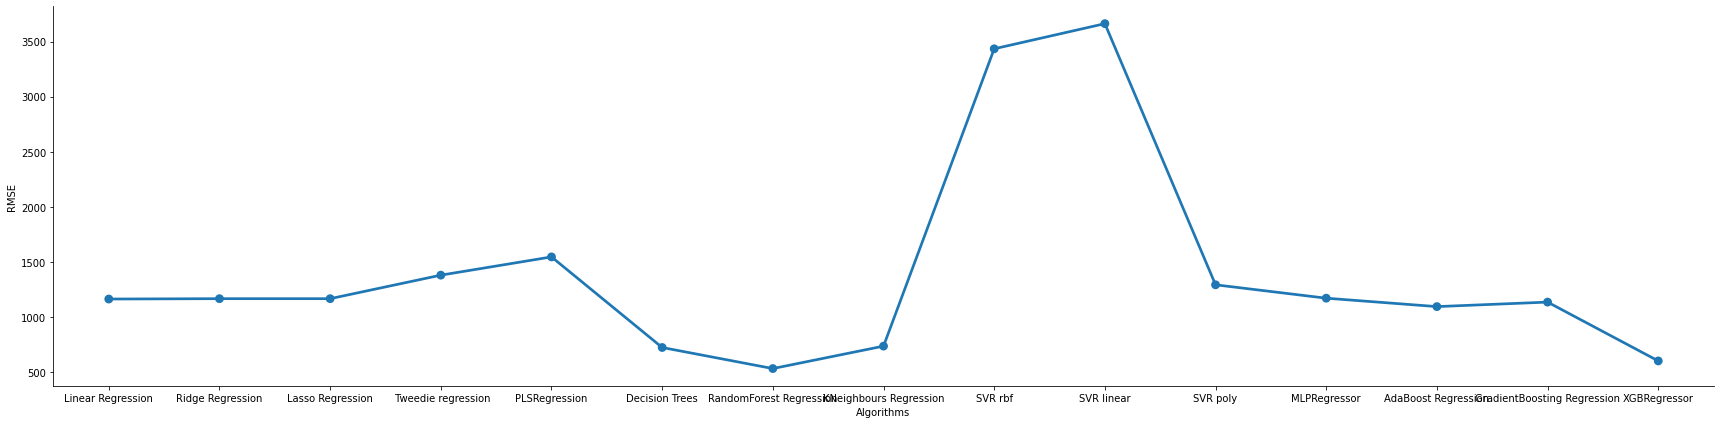

In [ ]:
sns.factorplot(x='Algorithms', y='RMSE' , data=compare, size=6 , aspect=4)

# cross_val_score

In [ ]:
RegModel=XGBRegressor()
# forest_reg.fit(x,y)
RegModel_rmse = cross_val_score(RegModel, X_train, y_train,scoring="neg_mean_squared_error", cv=10)
RegModel_rmse_scores = np.sqrt(-RegModel_rmse)
print("scores:", RegModel_rmse_scores)
print("Mean:", RegModel_rmse_scores.mean()) #557

[14:39:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:39:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:39:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:39:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:39:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:39:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:39:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:39:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:

forest_reg = RandomForestRegressor()
# forest_reg.fit(x,y)
forest_rmse = cross_val_score(forest_reg, X_train, y_train,scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_rmse)
print("scores:", forest_rmse_scores)
print("Mean:", forest_rmse_scores.mean()) #557

scores: [544.36660334 553.6451796  562.64787261 566.160003   544.78134695
 538.58096179 565.09185884 568.80813115 583.78042191 511.39778282]
Mean: 553.9260162017747


In [ ]:

forest_reg = DecisionTreeRegressor()
# forest_reg.fit(x,y)
forest_rmse = cross_val_score(forest_reg, X_train, y_train,scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_rmse)
print("scores:", forest_rmse_scores)
print("Mean:", forest_rmse_scores.mean())

scores: [735.00134097 786.48096136 738.22822924 796.97631473 715.11083087
 751.65453292 770.57154729 748.15079905 758.53706796 709.10111531]
Mean: 750.9812739698311


# Tuning Parameters


In [ ]:
# parameters = {'nthread':[x for x in range(1,6)], #when use hyperthread, xgboost may become slower
#               'objective':['reg:squarederror'],
#               'learning_rate': [.01,.03, 0.05,0.02], #so called `eta` value
#               'max_depth': [x for x in range(4,10)],
#               'min_child_weight': [4,3,5,6],
#               'silent': [1,2,3,4,5],
#               'subsample': [0.7],
#               'colsample_bytree': [0.7],
#               'n_estimators': [500,700,200,400,800]}
# RegModel=XGBRegressor()

# grid_search = GridSearchCV(RegModel, parameters, cv=5,scoring='neg_mean_squared_error',return_train_score=True)
# grid_search.fit(X_train,y_train)
# y_pred=grid_search.predict(X_test)
# meansquarederror(y_pred, y_test) # 523.555623184738

In [ ]:
# param_grid =
#               {'bootstrap': [False , True],
#                "criterion":["squared_error"],
#                'n_estimators': [x for x in range(1,100)],
#                'max_features': [x for x in range(1,9)],
#                "max_depth":[x for x in range(1,10)]
#               }


# # param_grid = [
# # {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
# # {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
# #]
# forest_reg = RandomForestRegressor()
# grid_search = GridSearchCV(forest_reg, param_grid, cv=5,scoring='neg_mean_squared_error',return_train_score=True)
# grid_search.fit(X_train,y_train)
# y_pred=grid_search.predict(X_test)
# meansquarederror(y_pred, y_test)

In [ ]:
RegModel=XGBRegressor(colsample_bytree= 0.7,learning_rate= 0.03,max_depth= 7,min_child_weight= 5,n_estimators= 500,nthread= 1,objective= 'reg:squarederror',subsample= 0.7)
RegModel.fit(X_train,y_train)
y_pred=RegModel.predict(X_test)
meansquarederror(y_pred, y_test)#523.874542444877

510.73053041583734

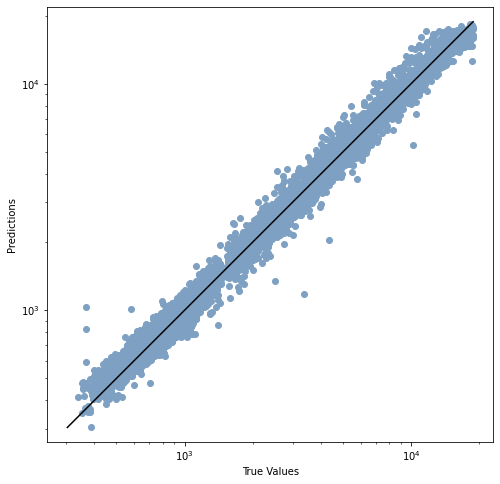

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(y_test, y_pred, c="#7ea0c3")
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], "k-")
plt.xlabel('True Values', fontsize=10)
plt.ylabel('Predictions', fontsize=10)
plt.axis('equal')
plt.show()

In [ ]:
forest_reg = RandomForestRegressor(bootstrap= True,
 criterion= 'squared_error',
 max_depth= 8,
 max_features= 6,
 n_estimators= 500)
forest_reg.fit(X_train,y_train)
y_pred=forest_reg.predict(X_test)
meansquarederror(y_pred, y_test)#523.874542444877

620.0847604608858

In [ ]:
# RegModel=XGBRegressor(colsample_bytree= 0.7,learning_rate= 0.03,max_depth= 7,min_child_weight= 4,n_estimators= 500,nthread= 4,objective= 'reg:squarederror',subsample= 0.7)
# RegModel.fit(x,y)
# final_model = RegModel

In [ ]:
# grid_search.best_params_

In [ ]:
# final_model = grid_search.best_estimator_

In [ ]:
y_pred = RegModel.predict(X_train)
meansquarederror(y_pred,y_train)

384.45149224291697

In [ ]:
y_pred = RegModel.predict(X_test)
meansquarederror(y_pred,y_test)

510.73053041583734

In [ ]:
y_pred=RegModel.predict(scaler.transform(test_df.drop("Id",axis=1,inplace=False)))
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


array([12328.171, 15862.726, 14819.909, ..., 15767.553, 16193.624,
       16958.725], dtype=float32)

In [ ]:
predictions = pd.Series(y_pred)
pred = pd.DataFrame({"Id":test_df['Id'],"price":predictions})
pred

,Id,price
0,1,12328.170898
1,2,15862.725586
2,3,14819.909180
3,4,15824.956055
4,5,12734.028320
...,...,...
10783,10784,15609.468750
10784,10785,16743.279297
10785,10786,15767.552734
10786,10787,16193.624023


In [ ]:
pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10788 entries, 0 to 10787
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      10788 non-null  int64  
 1   price   10788 non-null  float32
dtypes: float32(1), int64(1)
memory usage: 126.5 KB


In [ ]:
pred.to_csv("submission700.csv",index=False)